In [1]:
import numpy as np
import pandas as pd
# import plotly
import matplotlib.pyplot as plt

In [2]:
playlistName = "Example 1, id = 4pUzBoCxZzig6QncK4fcxD"
data = pd.read_csv('df_example_01.csv')
data.head()

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Boom Clap,SUCKER,Charli XCX,2015-02-09,169866,64,0.1540,0.659,0.911,0.000304,4,0.1910,-2.280,1,0.0786,91.999,4,0.576
1,Time of Our Lives,Globalization,Pitbull,2014-11-21,229360,81,0.0921,0.721,0.802,0.000000,1,0.6940,-5.797,1,0.0583,124.022,4,0.724
2,Pumped Up Kicks,Torches,Foster The People,2011-05-23,239600,84,0.1450,0.733,0.710,0.115000,5,0.0956,-5.849,0,0.0292,127.975,4,0.965
3,Titanium (feat. Sia),Nothing but the Beat (Ultimate Edition),David Guetta,2012-12-07,245040,79,0.0679,0.604,0.787,0.150000,0,0.1270,-3.674,0,0.1030,126.062,4,0.301
4,Blame (feat. John Newman),Motion,Calvin Harris,2014-10-31,212960,76,0.0287,0.414,0.857,0.005740,0,0.3430,-4.078,0,0.0808,128.024,4,0.348


In [86]:
def create_work():
    feat = ['acousticsness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence']
    name = ['Acoustique', 'Dansabilité', 'Energie', 'Insturmentalité', 'Tonalité', 'Live', 'Puissance acoustique', 'Mode', 'Parler', 'Tempo', 'Jovialité']
    desc = ["Décrit dans quelle proportion la piste est produite par des instruments acoustiques. 0 = électro | 1 = Vivaldi", "Décrit à quel point il est possible de danser sur la piste. 0 = émission radio | 1 = musique de boîte", "Décrit dans quelle mesure la piste est intense, active. 0 = prélude de Bach | 1 = death metal", "Décrit dans quelle proportion on entend des voix (paroles de chant, parlées) dans la piste. 0 = rap pur | 1 = pièce pour piano", "Donne la tonalité principale de la piste. 0 = Do, 1 = Do#, 2 = Ré, etc.", "Décrit si un public est présent. 0 = piste enregistré en studio | 1 = public qui chante avec l'artiste en concert", "Décrit à quel point la piste rend un son fort. -60 dB = ASMR | 0 dB = hard metal", "Donne le mode (majeur/mineur) de la piste. 0 = mineur ; 1 = majeur", "Décrit dans quelle mesure la piste contient des paroles parlées. 0 = musique pure | 1 = podcast", "Donne le tempo de la piste en battementss par minute (BPM).", "Décrit la positivité communiquée par la piste. 0 = Sound of Silence | 1 = Happy"]
    inte = [[0, 0.25, 0.5, 0.75, 1], [0, 0.33, 0.66, 1], [0, 0.33, 0.66, 1], [0, 0.5, 0.75, 1], None, [0, 0.5, 0.8, 1], None, None, [0, 0.33, 0.66, 1], None, [0, 0.25, 0.5, 0.75, 1]]
    tags = [['Synthétisé', 'Plutôt synthétisé', 'Plutôt acoustique', 'Acoustique'], ['Calme', 'De quoi battre le rythme', 'Très dansant'], ['Doux', 'Moyen', 'Energique'], ['Majorité de paroles', 'Majorité instrumentale', 'Instrumental pur'], None, ['Enregistrement studio', "Présence d'un petit public", 'Live'], None, None, ['Musical', 'Mélange discours et musique', 'Discours pur'], None, ['Très sombre', 'Plutôt sombre', 'Plutôt léger', 'Joyeux']]
    anly = [True, True, True, True, False, True, False, False, True, False, True]
    dict  = {'Audio-features':feat, 'Name':name, 'Description':desc, 'Intervalles':inte, 'Tags':tags, 'A analyser':anly}
    audio_feat = pd.DataFrame(dict).set_index('Audio-features')
    return audio_feat

In [87]:
audio_feat = create_work()

In [18]:
# Nombre de pistes total
nbrTotTracks = data.shape[0]
# Durée d'écoute totale (ms)
lengthTot = data['length'].sum()

In [21]:
# Nombre de piste par artiste
y = data['artist'].value_counts()
# Nombre d'artiste par nbr d'occurences
y.value_counts()

In [25]:
# Ecart-type du tempo (si petit -> playlist de sport ? marche ?)
data['tempo'].std()

23.77077767011074

(array([ 1.,  0.,  0.,  0.,  1.,  1.,  4.,  4.,  8., 20.]),
 array([14., 21., 28., 35., 42., 49., 56., 63., 70., 77., 84.]),
 <BarContainer object of 10 artists>)

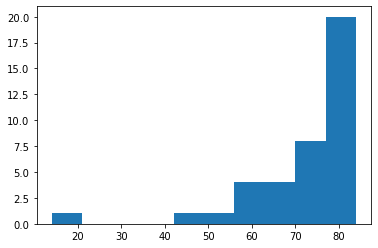

In [30]:
plt.hist(data['popularity'])

In [57]:
def date_to_year(date):
    return int(date[:4])
date_to_year = np.vectorize(date_to_year)

In [58]:
data["release_year"] = date_to_year(data['release_date'])

<BarContainer object of 10 artists>

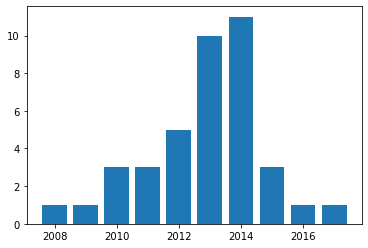

In [73]:
y = data['release_year'].value_counts()
plt.bar(y.index, y)

Plusieurs pistes pour analyser :
- ajouter à `audio_feat` une colonne correspondant aux tags associés  la playlist en question
- enregistrer un dataframe en csv pour pouvoir l'utiliser dans d'autres codes
- caractériser certains tags comme "déterminants" pour qu'ils soient pris en compte dans l'analyse approfondie